In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Parameters
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [12]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [13]:
# Weight and Bias, initialized randomly
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Linear_regression (Wx + b)
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred - y_true, 2) / (2 * n_samples))

# Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [14]:
# Optimize processes
def run_optimization():
    # Wrap computation inside a GradientTape for audo diff
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    
    # compute gradients
    gradients = g.gradient(loss, [W, b])
    # apply_gradients(grads_and_vars)， Apply gradients to variables
    # 在相应的变量上应用梯度，即在最优化的问题上应用梯度，W, b
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [15]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" %
              (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.085854, W: 0.305195, b: 0.419086
step: 100, loss: 0.084833, W: 0.302039, b: 0.441459
step: 150, loss: 0.083929, W: 0.299069, b: 0.462514
step: 200, loss: 0.083128, W: 0.296274, b: 0.482329
step: 250, loss: 0.082419, W: 0.293644, b: 0.500975
step: 300, loss: 0.081791, W: 0.291169, b: 0.518524
step: 350, loss: 0.081235, W: 0.288839, b: 0.535038
step: 400, loss: 0.080743, W: 0.286647, b: 0.550579
step: 450, loss: 0.080306, W: 0.284584, b: 0.565205
step: 500, loss: 0.079920, W: 0.282643, b: 0.578969
step: 550, loss: 0.079578, W: 0.280816, b: 0.591922
step: 600, loss: 0.079275, W: 0.279096, b: 0.604111
step: 650, loss: 0.079007, W: 0.277478, b: 0.615583
step: 700, loss: 0.078769, W: 0.275956, b: 0.626378
step: 750, loss: 0.078559, W: 0.274523, b: 0.636538
step: 800, loss: 0.078372, W: 0.273174, b: 0.646098
step: 850, loss: 0.078207, W: 0.271905, b: 0.655096
step: 900, loss: 0.078061, W: 0.270711, b: 0.663563
step: 950, loss: 0.077931, W: 0.269587, b: 0.671531
step: 1000, l

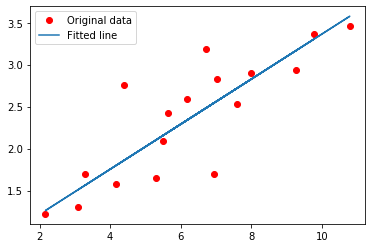

In [16]:
plt.plot(X, Y, 'ro', label="Original data")
plt.plot(X, np.array(W * X + b), label="Fitted line")
plt.legend()
plt.show()